# Classification

In [1]:
import numpy as np
from sklearn import datasets

# Load a dataset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
iris['data'][:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris['target'][:5]

array([0, 0, 0, 0, 0])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Logistic regression
Let's try to classify the Iris dataset using a logistic regression model.

In [6]:
# First let's create a feature vector and a target
X = iris['data'][:, 3:] # Use only the last feature, the petal width
y = (iris['target'] == 2).astype(int)

# Split the data into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=101)

# Fit a logistic model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

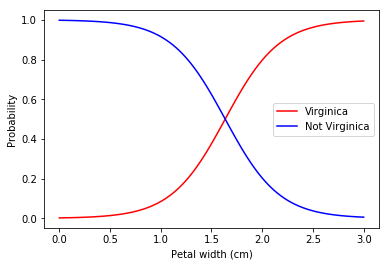

In [7]:
# Plot the probability of each class
X_tmp = np.linspace(0,3,100).reshape(100,1)
y_prob = model.predict_proba(X_tmp)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_tmp, y_prob[:,1], 'r-', label='Virginica')
plt.plot(X_tmp, y_prob[:,0], 'b-', label='Not Virginica')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend();

In [8]:
# Check prediction accuracy
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
0.9333333333333333

Confusion matrix:
[[32  1]
 [ 2 10]]


# Multiclass classification

In [9]:
X = iris['data']
y = iris['target']

# Split the data into train/test sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=101)

model = LogisticRegression(multi_class='multinomial', 
                           solver='newton-cg').fit(X_train, y_train)

In [10]:
# Check prediction accuracy
y_pred = model.predict(X_test)

print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
0.9777777777777777

Confusion matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [11]:
# Use SGDClassifier
from sklearn.linear_model import SGDClassifier

# Fit model
model = SGDClassifier(random_state=7,
                      max_iter=100, 
                      tol=1e-2).fit(X_train, y_train)

# Check prediction accuracy
y_pred = model.predict(X_test)

print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
0.9333333333333333

Confusion matrix:
[[12  1  0]
 [ 0 18  2]
 [ 0  0 12]]


In [12]:
# Use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit model
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# Check prediction accuracy
y_pred = model.predict(X_test)

print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
0.9333333333333333

Confusion matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  2 10]]


In [13]:
# Use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fit model
model = RandomForestClassifier(random_state=7,
                               n_estimators=100).fit(X_train, y_train)

# Check prediction accuracy
y_pred = model.predict(X_test)

print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
0.9777777777777777

Confusion matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [14]:
# Use KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Fit model
model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# Check prediction accuracy
y_pred = model.predict(X_test)

print('Accuracy:')
print(accuracy_score(y_test, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy:
1.0

Confusion matrix:
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


### Effect of training set size

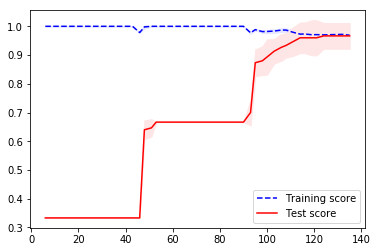

In [15]:
from sklearn.model_selection import learning_curve

# Create cross-validation training and test scores for different training set sizes
train_sizes, train_scores, test_scores = \
    learning_curve(KNeighborsClassifier(n_neighbors=5),
                   X, y, cv=10,
                   scoring='accuracy',
                   n_jobs=-1, #use all CPUs
                   train_sizes=np.linspace(0.05, 1, 50))

# Compute mean and std of the training/test set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'b--', label='Training score')
plt.plot(train_sizes, test_mean, 'r', label='Test score')

plt.fill_between(train_sizes,
                 train_mean-train_std,
                 train_mean+train_std,
                 color=[.9, .9, 1])

plt.fill_between(train_sizes,
                 test_mean-test_std,
                 test_mean+test_std,
                 color=[1, .9, .9])

plt.legend();